<a href="https://colab.research.google.com/github/hiranmarques/MachineLearning-and-Data-Science/blob/main/exerciciofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lista de Exercícios com Machine Learning Modelos Avançados.
# HIRAN MARQUES CALDEIRA
# ADS P3

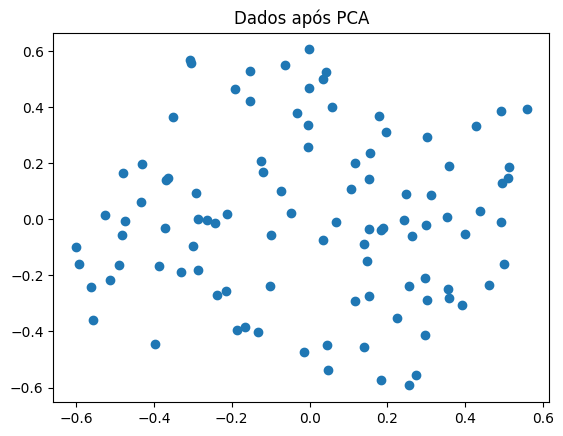

In [2]:
# QUESTÃO 1

import numpy as np
import matplotlib.pyplot as plt

# Gerar um conjunto de dados aleatório
np.random.seed(42)
X = np.random.rand(100, 3)

# Centralizar os dados
X_meaned = X - np.mean(X, axis=0)

# Calcular a matriz de covariância
cov_matrix = np.cov(X_meaned, rowvar=False)

# Obter os autovalores e autovetores
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

# Ordenar autovalores em ordem decrescente
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# Escolher os dois principais componentes
eigenvector_subset = sorted_eigenvectors[:, 0:2]

# Transformar os dados
X_reduced = np.dot(eigenvector_subset.T, X_meaned.T).T

# Visualizar os dados transformados
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title("Dados após PCA")
plt.show()

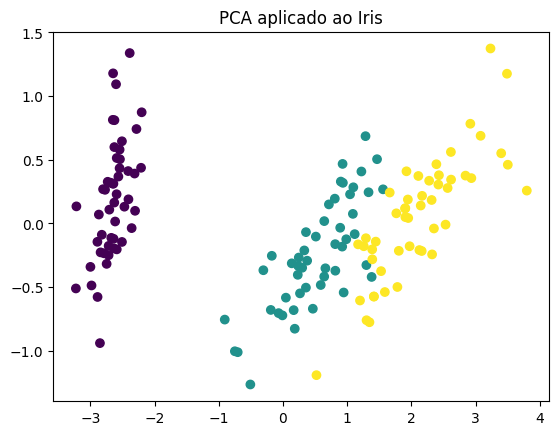

Variância explicada pelos componentes principais:  [0.92461872 0.05306648]


In [3]:
# QUESTÃO 2

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Carregar o dataset Iris
data = load_iris()
X = data.data

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar os dados reduzidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target)
plt.title("PCA aplicado ao Iris")
plt.show()

# Variância explicada
print("Variância explicada pelos componentes principais: ", pca.explained_variance_ratio_)

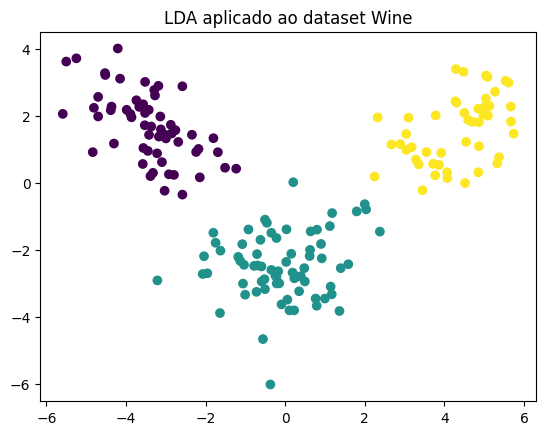

In [4]:
# QUESTÃO 3

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# Carregar o dataset Wine
data = load_wine()
X = data.data
y = data.target

# Aplicar LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Visualizar as classes separadas
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.title("LDA aplicado ao dataset Wine")
plt.show()

In [5]:
# QUESTÃO 4

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Exemplo de matriz de avaliações (usuário x filme)
ratings = np.array([[5, 4, 0, 0],
                    [3, 0, 0, 5],
                    [4, 0, 4, 4],
                    [0, 3, 5, 2],
                    [0, 4, 4, 5]])

# Similaridade entre usuários
user_similarity = cosine_similarity(ratings)

# Similaridade entre itens
item_similarity = cosine_similarity(ratings.T)

# Prever avaliações (Filtragem Colaborativa baseada em Usuário)
def predict_user_based(ratings, similarity):
    mean_user_rating = ratings.mean(axis=1)
    ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred

# Prever avaliações (Filtragem Colaborativa baseada em Item)
def predict_item_based(ratings, similarity):
    pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# Previsões
user_based_prediction = predict_user_based(ratings, user_similarity)
item_based_prediction = predict_item_based(ratings, item_similarity)

print("Previsão baseada em usuário:\n", user_based_prediction)
print("Previsão baseada em item:\n", item_based_prediction)

Previsão baseada em usuário:
 [[2.96028528 2.24767854 1.60905414 2.18298204]
 [2.11703553 0.97753355 1.67420946 3.23122146]
 [2.76471718 2.17718401 3.1551786  3.90292021]
 [1.33351785 2.24066528 3.32540154 3.10041533]
 [2.29291365 2.84304311 3.76980704 4.0942362 ]]
Previsão baseada em item:
 [[2.98702975 2.41740095 1.52239148 1.6661864 ]
 [2.48075649 1.46080674 1.70099537 2.40067752]
 [3.22005754 2.44255448 3.03902676 3.29086401]
 [1.70903901 2.79442172 3.13960848 2.59251323]
 [2.46563099 3.50100235 3.82369429 3.59964913]]


In [6]:
# QUESTÃO 5

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Matriz de usuários x filmes (exemplo simples)
ratings = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

# Similaridade baseada em usuários
user_similarity = cosine_similarity(ratings)

# Previsões baseadas em usuários
user_prediction = user_similarity.dot(ratings) / np.array([np.abs(user_similarity).sum(axis=1)]).T

print("Previsão de recomendações baseadas em usuário:\n", user_prediction)


Previsão de recomendações baseadas em usuário:
 [[3.25728282 1.27161425 0.32196123 2.18016523]
 [3.16937287 1.08659747 0.25798269 2.22055918]
 [1.67547185 0.83912519 0.90462638 3.5564201 ]
 [1.6695374  0.78567996 0.87579219 3.54996468]
 [1.07021878 0.84994791 1.95720383 3.85391364]]


In [7]:
# QUESTÃO 6

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Dados dos produtos (exemplo de textos descritivos)
produtos = [
    "Camiseta vermelha, tamanho M",
    "Calça jeans azul, tamanho G",
    "Sapato social preto",
    "Jaqueta de couro marrom, tamanho M"
]

# Converter os textos em vetores TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(produtos)

# Similaridade de produtos
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Exibir similaridade entre os produtos
print("Matriz de similaridade entre produtos:\n", cosine_sim)

Matriz de similaridade entre produtos:
 [[1.         0.14224755 0.         0.12507349]
 [0.14224755 1.         0.         0.10513035]
 [0.         0.         1.         0.        ]
 [0.12507349 0.10513035 0.         1.        ]]


In [12]:
# QUESTÃO 7

!pip install tpot

# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tpot import TPOTClassifier

# Carregar o dataset Iris
data = load_iris()
X, y = data.data, data.target

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de árvore de decisão tradicional
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Prever com o modelo tradicional
y_pred_tree = tree_model.predict(X_test)

# Avaliar a acurácia do modelo tradicional
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Acurácia do modelo de árvore de decisão: {accuracy_tree:.4f}")

# Utilizar TPOT para automação do processo de modelagem
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)
tpot.fit(X_train, y_train)

# Prever com o modelo gerado pelo TPOT
y_pred_tpot = tpot.predict(X_test)

# Avaliar a acurácia do modelo TPOT
accuracy_tpot = accuracy_score(y_test, y_pred_tpot)
print(f"Acurácia do modelo TPOT: {accuracy_tpot:.4f}")

# Exportar o melhor modelo encontrado pelo TPOT
tpot.export('best_model_pipeline.py')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.7 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=2ea3d64a86b7e74e95f26abac0850c0844fce16d0a3201a3b06a814bd36ebbd6
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
Acurácia do modelo de árvore de decisão: 1.0000


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9833333333333334

Generation 2 - Current best internal CV score: 0.9833333333333334

Generation 3 - Current best internal CV score: 0.9833333333333334

Generation 4 - Current best internal CV score: 0.9833333333333334

Generation 5 - Current best internal CV score: 0.9833333333333334

Best pipeline: LogisticRegression(MultinomialNB(input_matrix, alpha=10.0, fit_prior=False), C=25.0, dual=False, penalty=l2)
Acurácia do modelo TPOT: 1.0000


In [13]:
# QUESTÃO 8

from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AutoML com TPOT
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)

# Prever e avaliar
print(f"Acurácia com TPOT: {tpot.score(X_test, y_test)}")

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.975

Generation 2 - Current best internal CV score: 0.9833333333333332

Generation 3 - Current best internal CV score: 0.9833333333333332

Generation 4 - Current best internal CV score: 0.9833333333333332

Generation 5 - Current best internal CV score: 0.9833333333333332

Best pipeline: KNeighborsClassifier(Normalizer(input_matrix, norm=l2), n_neighbors=3, p=2, weights=uniform)
Acurácia com TPOT: 0.9666666666666667


In [14]:
# QUESTÃO 9

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# Dataset (exemplo aleatório)
X = np.random.rand(100, 2)
y = np.random.randint(2, size=100)

# Função para criar um modelo Bagging
def bagging(X, y, n_estimators=10):
    models = []
    for _ in range(n_estimators):
        X_resampled, y_resampled = resample(X, y)
        model = DecisionTreeClassifier()
        model.fit(X_resampled, y_resampled)
        models.append(model)
    return models

# Prever com Bagging
def predict_bagging(models, X):
    predictions = np.array([model.predict(X) for model in models])
    return np.round(np.mean(predictions, axis=0))

# Treinar modelo Bagging
models = bagging(X, y)
y_pred = predict_bagging(models, X)

# Avaliar precisão
print("Precisão do Bagging:", accuracy_score(y, y_pred))

Precisão do Bagging: 0.96


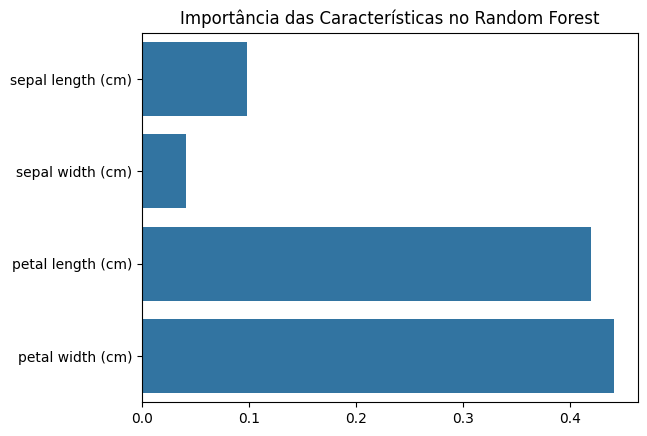

In [15]:
# QUESTÃO 10

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset Iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Importância das características
importances = model.feature_importances_
sns.barplot(x=importances, y=load_iris().feature_names)
plt.title("Importância das Características no Random Forest")
plt.show()

In [16]:
# QUESTÃO 11

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o dataset Iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo AdaBoost com árvore de decisão base
base_model = DecisionTreeClassifier(max_depth=1)
boosting_model = AdaBoostClassifier(base_model, n_estimators=50)

# Treinar o modelo
boosting_model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = boosting_model.predict(X_test)
print(f"Acurácia do AdaBoost: {accuracy_score(y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acurácia do AdaBoost: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


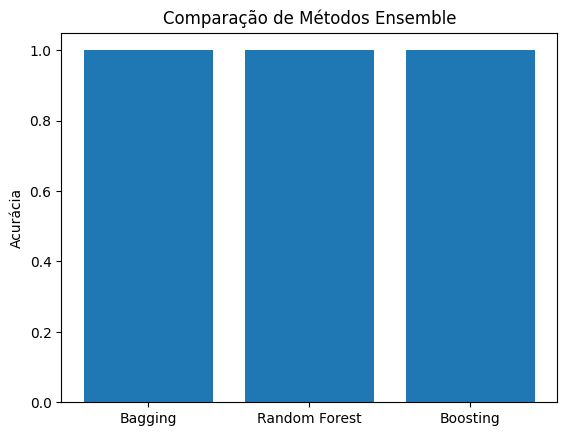

In [17]:
# QUESTÃO 12

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Carregar o dataset Iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50)
bagging.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging.predict(X_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# Boosting
boosting = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50)
boosting.fit(X_train, y_train)
boosting_acc = accuracy_score(y_test, boosting.predict(X_test))

# Comparação de acurácia
models = ['Bagging', 'Random Forest', 'Boosting']
accs = [bagging_acc, rf_acc, boosting_acc]

plt.bar(models, accs)
plt.title("Comparação de Métodos Ensemble")
plt.ylabel("Acurácia")
plt.show()

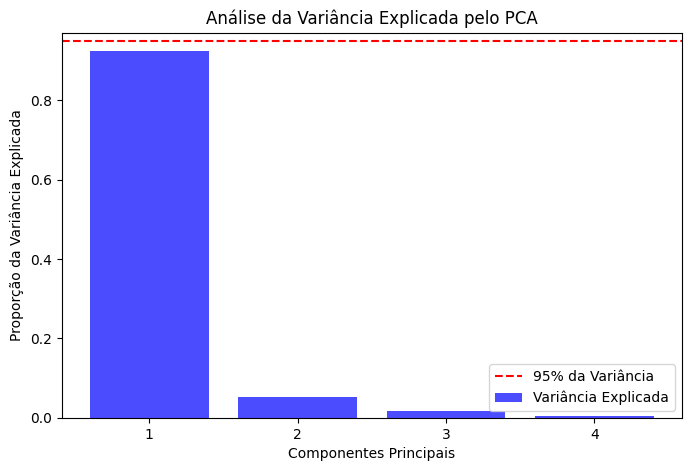

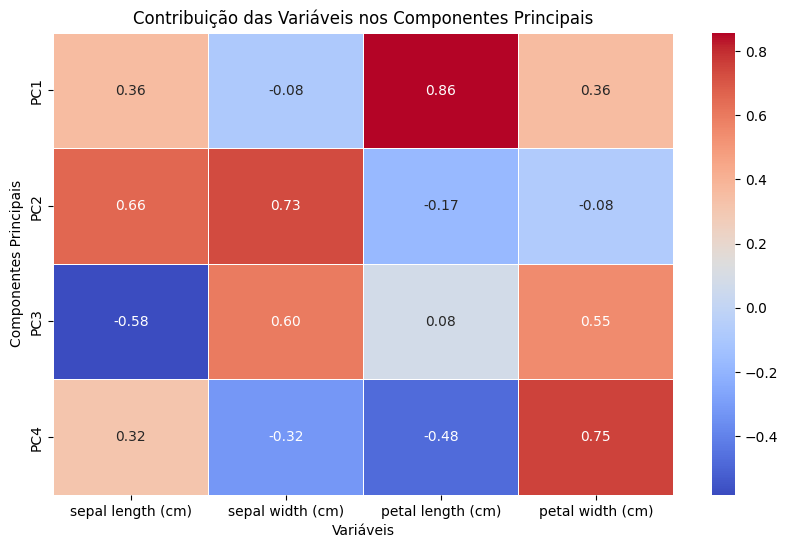

In [18]:
# QUESTÃO 13

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import seaborn as sns

# Carregar o dataset Iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Variância explicada
explained_variance = pca.explained_variance_ratio_

# Gráfico da variância explicada
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b', label='Variância Explicada')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.title('Análise da Variância Explicada pelo PCA')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.axhline(y=0.95, color='r', linestyle='--', label='95% da Variância')
plt.legend()
plt.show()

# Análise dos componentes principais
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=[f'PC{i+1}' for i in range(len(explained_variance))])

# Visualizar a contribuição das variáveis em cada componente
plt.figure(figsize=(10, 6))
sns.heatmap(components_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Contribuição das Variáveis nos Componentes Principais')
plt.xlabel('Variáveis')
plt.ylabel('Componentes Principais')
plt.show()

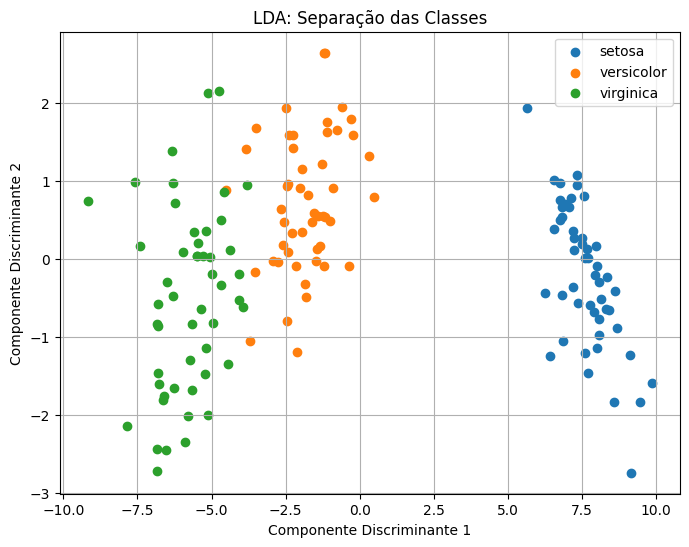

Coeficientes das variáveis:
 [[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]


In [19]:
# QUESTÃO 14

import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Carregar o dataset Iris
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Aplicar LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Visualizar a separação das classes
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name)
plt.title('LDA: Separação das Classes')
plt.xlabel('Componente Discriminante 1')
plt.ylabel('Componente Discriminante 2')
plt.legend()
plt.grid()
plt.show()

# Coeficientes das variáveis
coefficients = lda.coef_
print("Coeficientes das variáveis:\n", coefficients)

In [20]:
# QUESTÃO 15

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

# Carregar o dataset Iris
X, y = load_iris(return_X_y=True)

# Criar o pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svm', SVC(kernel='linear'))
])

# Avaliar o pipeline com validação cruzada
scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Desempenho do pipeline: {scores.mean()}")




Desempenho do pipeline: 0.9133333333333333
